In [45]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from bokeh import plotting
import matplotlib.text as mtext

In [46]:
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")


In [47]:
ride_data_cal = ride_data.groupby('city')
#Calculate average fare per city
average_ride_fare = round(ride_data_cal['fare'].mean(),2)
average_ride_fare
#Calculate total ride per city
total_ride = ride_data_cal['ride_id'].count()
total_ride
#Create new dataframe with 2 new data
ride_data_cal = pd.DataFrame({ "average fare":average_ride_fare,"total ride": total_ride})
ride_data_cal.reset_index('city',inplace=True)
#Merge new dataframe with city_data to correspond the cities with its types(Urban, Suburban, Rural)
consol_data = pd.merge(ride_data_cal,city_data,how="left", on=["city", "city"])

# Bubble Plot of Ride Sharing Data

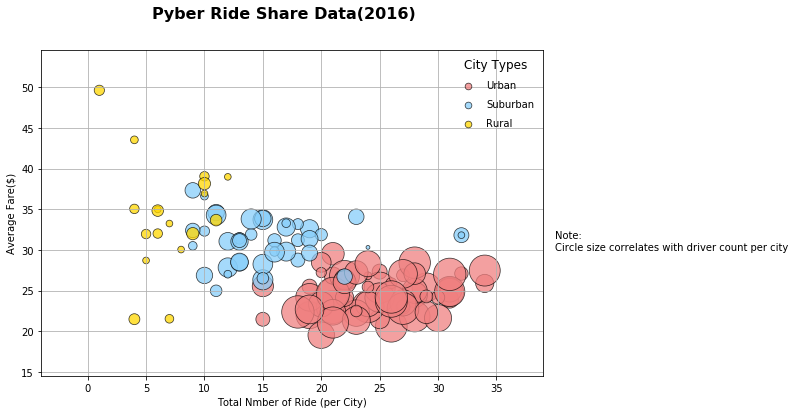

In [48]:
#fig,ax = plt.subplots()

#Filter data based on City Types
urban_data = consol_data[consol_data['type']=='Urban']
suburban_data = consol_data[consol_data['type']=='Suburban']
rural_data = consol_data[consol_data['type']=='Rural']
#Plot out
plt.figure(figsize=(9,6))
plt.scatter(urban_data['total ride'], urban_data['average fare'], s=urban_data['driver_count']*15,alpha=0.75,c='lightcoral',label='Urban',edgecolor='black',linewidths=0.75)
plt.scatter(suburban_data['total ride'], suburban_data['average fare'], s=suburban_data['driver_count']*15,alpha=0.75,c='lightskyblue',label='Suburban',edgecolor='black',linewidths=0.75)
plt.scatter(rural_data['total ride'], rural_data['average fare'], s=rural_data['driver_count']*15,alpha=0.75,c='gold',label='Rural',edgecolor='black',linewidths=0.75)

#for key, row in consol_data.iterrows():
#    if row['type'] =='Urban':
 #       plt.scatter(row['total ride'], row['average fare'], s=row['driver_count']*8,alpha=0.5,c='lightcoral',label='Urban')
  #      #urban_patch = mpatches.Patch(color='red', label='Urban',linestyle = 'dotted')
   # elif row['type'] =='Suburban':
    #    plt.scatter(row['total ride'], row['average fare'], s=row['driver_count']*7, alpha=0.5,c='lightskyblue',label='Suburban')
        #suburban_patch = mpatches.Patch(color='blue', label='Suburban')
    #elif row['type'] =='Rural':
     #   plt.scatter(row['total ride'], row['average fare'], s=row['driver_count']*6, alpha=0.5,c='gold',label='Rural')
        #rural_patch = mpatches.Patch(color='yellow', label='Rural')
#legend_elements = [Line2D([0], [0], marker = 'o', color='red',label='Urban',markerfacecolor='red', markersize=5),
 #                  Line2D([0], [0], marker='o', color='blue', label='Suburban',markerfacecolor='blue', markersize=5),
  #                 Line2D([0], [0], marker = 'o', color='yellow',label='Rural',markerfacecolor='yellow', markersize=5)]
#handles, labels = ax.get_legend_handles_labels()
#labels = ['Urban','Suburban','Rural']
#handles = ['red','yellow','blue']
#check1 = plt.legend(frameon=False)
#check1.legendHandles[0]._sizes=[45]
#check1.legendHandles[0].set_color('lightcoral')
#check1.legendHandles[1]._sizes=[35]
#check1.legendHandles[1].set_color('lightskyblue')
#check1.legendHandles[2]._sizes=[50]
#check1.legendHandles[2].set_color('gold')

plt.xlim(min(consol_data['total ride'])-5, max(consol_data['total ride'])+5)
plt.ylim(min(consol_data['average fare'])-5, max(consol_data['average fare'])+5)
plt.suptitle("Pyber Ride Share Data(2016)", fontsize = 16, fontweight="bold")
plt.text(40,30,'Note:\nCircle size correlates with driver count per city')
plt.xlabel('Total Nmber of Ride (per City)')
plt.ylabel('Average Fare($)')
#Set legend title and size of points
fontsiz = plt.legend(frameon=False,labelspacing=0.9)
fontsiz.set_title("City Types", prop = {'size':12})
fontsiz.legendHandles[0]._sizes=[45]
fontsiz.legendHandles[1]._sizes=[45]
fontsiz.legendHandles[2]._sizes=[45]
plt.grid()
plt.savefig("Images/Pyberrideshare.png")
plt.show()




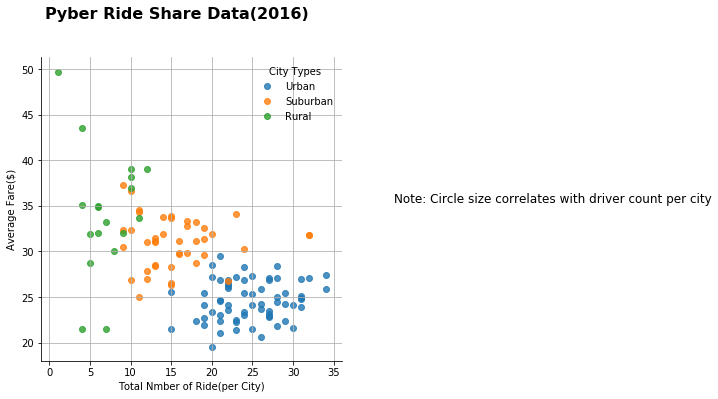

In [49]:
#Using seaborn to chart out
import seaborn as sns
seadata = consol_data.rename(columns={"type": "City Types"})
sns.lmplot(x="total ride", y="average fare", data=seadata , fit_reg=False, hue="City Types", legend=True, legend_out=False)
plt.suptitle("Pyber Ride Share Data(2016)", fontsize = 16, fontweight="bold",y=1.1)
plt.title('Note: Circle size correlates with driver count per city',x=1.7,y=0.5)
plt.xlabel('Total Nmber of Ride(per City)')
plt.ylabel('Average Fare($)')
plt.grid()
plt.legend(title='City Types',frameon=False)
plt.show()


# Total Fares by City Type

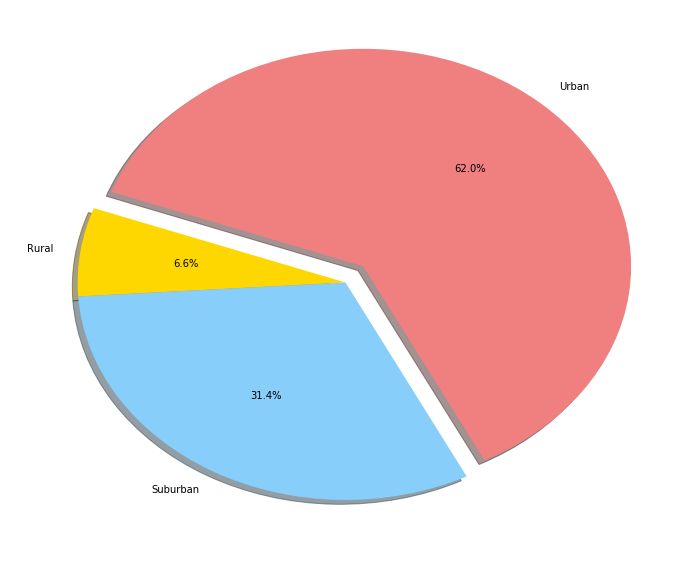

In [50]:
#Reuse city_data calculate, merge with ride data to calculate total fare.
merge_data = pd.merge(ride_data,city_data, how="left", on=["city", "city"])
#all Charts below relate to City Type so will use this dataframe 'total_type'
total_type = merge_data.groupby('type')
chart_fare = total_type['fare'].sum().reset_index()

colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.figure(figsize=(12,10))
#total_percentage_chart = chart_fare.plot(kind="pie",explode=explode,colors=colors, autopct="%1.1f%%",shadow=True, startangle=160, title="% of Total Fares by City Type")
plt.pie(chart_fare['fare'],explode=explode,labels=chart_fare['type'],colors=colors,autopct="%1.1f%%", shadow=True, startangle=160)
plt.savefig("Images/totalfarescity.png")
plt.show()

# Total Rides by City Type

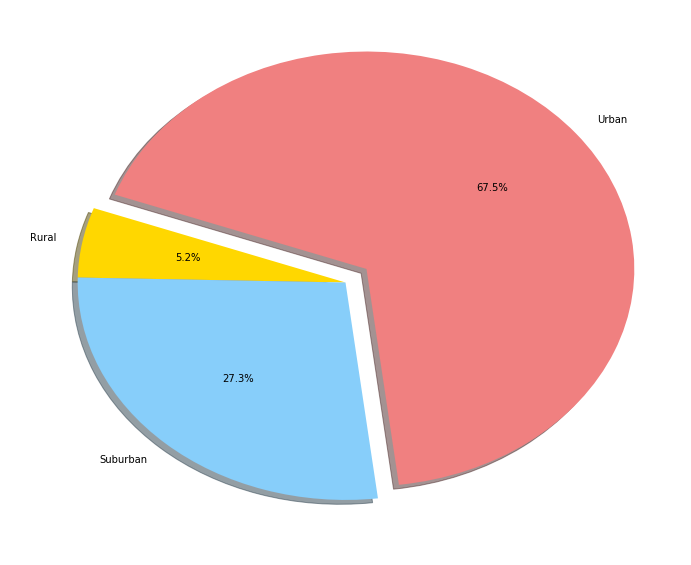

In [51]:
plt.figure(figsize=(12,10))
chart_ride = total_type['ride_id'].count().reset_index()
plt.pie(chart_ride['ride_id'],explode=explode,labels=chart_ride['type'],colors=colors,autopct="%1.1f%%", shadow=True, startangle=160)
plt.savefig("Images/totalridescity.png")
plt.show()


# Total Drivers by City Type

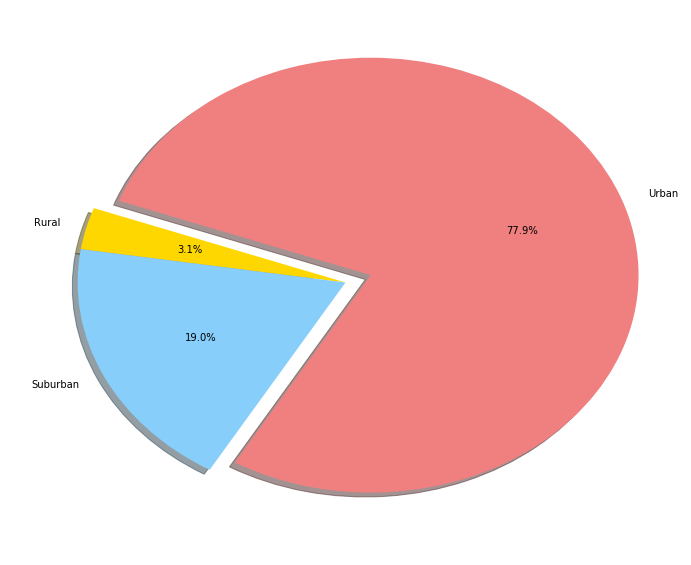

In [52]:
city_data.drop_duplicates(subset=['city'],inplace=True)
plt.figure(figsize=(12,10))
chart_driver = city_data.groupby("type")['driver_count'].sum().reset_index()
plt.pie(chart_driver['driver_count'],explode=explode,labels=chart_driver['type'],colors=colors,autopct="%1.1f%%", shadow=True, startangle=160)
plt.savefig("Images/totaldriverscity.png")
plt.show()